In [26]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
# Q1 A generalized function to calculate the mean, standard deviation and histogram for an image
# Returns global mean and std and 2D array of size (2,256) for B/W image consisting Pixel Intensity and Population 
# 3D array of size (2,256,3) for RGB image consisting pixel intensity, population and channel

def calculate_metrics(input_image):
    mean = np.array(np.sum(input_image)/ np.size(input_image))
    std_deviation = np.array(np.sqrt(np.sum(np.square(input_image - mean))/ np.size(input_image)))
    
    def histogram(img):
        l, m = np.shape(img)
        h = np.array([np.arange(0,256), np.zeros(256)], dtype=int)
        for k in range(l):
            for i in range(m):
                pix=img[k, i]
                h[1, pix] += 1
        return h      #returns [intensity_value, pixel_count] for 2D image
    if (input_image.ndim == 2):
        hist = histogram(input_image)
    elif (input_image.ndim == 3):
        hist = np.zeros((2,256,3), dtype=int)
        for i in range(0,3):
            hist[:,:,i] = histogram(input_image[:,:,i]) 
    return mean, std_deviation, hist

In [35]:
img = cv2.imread("Lena.png")
a,b,t = calculate_metrics(img)
#plt.imshow(img)
print(a, np.mean(img))
print(b, np.std(img))

128.22837575276694 128.22837575276694
58.983724593480176 58.983724593480176


In [29]:
print(type(a),type(b),type(t))
print(t[:,:,0])
print(t[:,:,1])
print(t[:,:,2])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60   61   62   63   64   65   66   67   68   69
    70   71   72   73   74   75   76   77   78   79   80   81   82   83
    84   85   86   87   88   89   90   91   92   93   94   95   96   97
    98   99  100  101  102  103  104  105  106  107  108  109  110  111
   112  113  114  115  116  117  118  119  120  121  122  123  124  125
   126  127  128  129  130  131  132  133  134  135  136  137  138  139
   140  141  142  143  144  145  146  147  148  149  150  151  152  153
   154  155  156  157  158  159  160  161  162  163  164  165  166  167
   168  169  170  171  172  173  174  175  176  177  178  179  1

(2, 256, 3)


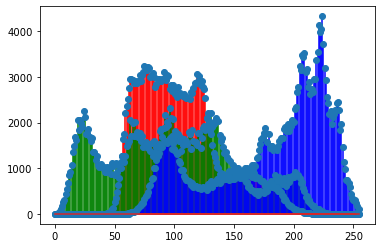

In [30]:
print(t.shape)
plt.stem(t[0,:,0], t[1,:,0],'r')
plt.stem(t[0,:,1], t[1,:,1],'g')
plt.stem(t[0,:,2], t[1,:,2],'b')
plt.show()

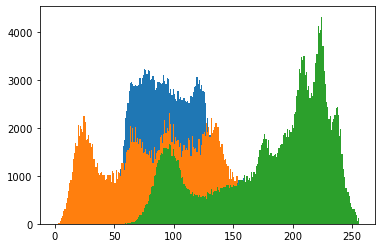

In [31]:
b, g, r = cv2.split(img)

plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])
plt.show()

In [33]:
#  Q2 A generalized function to perform image normalization according to the user input:
# 1. Pixel Normalization
# 2. Pixel Centering
# 3. Pixel Standardization
# and to return the output image, mean, range and variance

def normalisation(input_image, pn, pc, ps):
    
    def mean(m):
        return (np.sum(m)/ (np.size(m)))
    
    def variance(img):
        return (np.sum(np.square(img - mean(img)))/ np.size(img))
    if (pn):      
        input_image = (input_image) / (np.max(input_image))
    if (pc):
        img_mean= mean(input_image)    
        input_image = input_image - img_mean
    if (ps):
        image = input_image - mean(input_image)
        std_deviation = (variance(image))**0.5
        input_image = image / std_deviation
    
    output_normalized_image = input_image
    mean_output_img = np.array(mean(output_normalized_image))
    variance_output_img = np.array(variance(output_normalized_image))
    range_output_img = np.array([np.min(output_normalized_image) , np.max(output_normalized_image)])
    
    return output_normalized_image, mean_output_img, range_output_img, variance_output_img

In [34]:
normalisation(img, True, False, False)

(array([[[0.49019608, 0.5372549 , 0.88627451],
         [0.49019608, 0.5372549 , 0.88627451],
         [0.52156863, 0.5372549 , 0.8745098 ],
         ...,
         [0.47843137, 0.58039216, 0.90196078],
         [0.43137255, 0.50980392, 0.86666667],
         [0.35294118, 0.38823529, 0.78431373]],
 
        [[0.49019608, 0.5372549 , 0.88627451],
         [0.49019608, 0.5372549 , 0.88627451],
         [0.52156863, 0.5372549 , 0.8745098 ],
         ...,
         [0.47843137, 0.58039216, 0.90196078],
         [0.43137255, 0.50980392, 0.86666667],
         [0.35294118, 0.38823529, 0.78431373]],
 
        [[0.49019608, 0.5372549 , 0.88627451],
         [0.49019608, 0.5372549 , 0.88627451],
         [0.52156863, 0.5372549 , 0.8745098 ],
         ...,
         [0.47843137, 0.58039216, 0.90196078],
         [0.43137255, 0.50980392, 0.86666667],
         [0.35294118, 0.38823529, 0.78431373]],
 
        ...,
 
        [[0.23529412, 0.07058824, 0.32941176],
         [0.23529412, 0.07058824, 0.32941